
# Project: TMDb-Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<a id='intro'></a>
## Introduction

> The Data set I selected for Investigating is TMDb movie data, this dataset contains information about 10,000 movies collected from The Movie Database(TMDb), including 21 features like popularity , revenue, genres. 
> The questions I plan to explore over the dataset are basically from the example questions given by the project introcution:
which genres are most popular from those years?
what kinds of properties are asscociated with movies that have high revenues?
>If I have more time I would like to do more analysis about the correlation btw directors and high revenue movies ;) 

In [2]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, firstly I load the data, and use .head(), .shape,.info(), and .describe() to check what is the dataset looks like, and the cleanliness about the data. 


### General Properties

> For this dataset, there are 10866 movies and 21 variables associated with them. 9 variables have missing value. 
In the very first step, I found there are several variables can be dropped for further analysis, like 'id', 'imdb_id','cast', 'homepage','tagline' and 'overview'. For the variable 'genres', which contains multiple values separated by "|" characters, so I will handle this issue later in data cleaning step for answering the first question, to pick which movie categories has the most popularity.

> The final two coulmns ending with "\_adj" show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inlation over time. So for exploring the second question, using these two coulmns maybe more appropriate  

First, let's load the data and check the variables in this data.

In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Seems we have some missing values, let's count how many there are .

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning 

The first step is to drop those unuseful columns. In this step, column  'id','imdb_id','keywords','cast','homepage','tagline','overview' has been dropped.

In [7]:
df.drop(['id','imdb_id','keywords','cast','homepage','tagline','overview'], axis=1, inplace=True)

After dropping, only 14 columns left.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   release_date          10866 non-null  object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_year          10866 non-null  int64  
 12  budget_adj            10866 non-null  float64
 13  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


we could then check the number of missing values within each variable again.


In [9]:
df.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

As the key variable is the genres, we only want to keep those record with non-missing genres values.

In [10]:
df.dropna(subset=['genres'], inplace=True)

let's have a quick look on what's left, it seems that many moives have more than one genres.

In [11]:
df['genres'].value_counts()

Comedy                            712
Drama                             712
Documentary                       312
Drama|Romance                     289
Comedy|Drama                      280
                                 ... 
Drama|Action|Adventure              1
TV Movie|Horror|Mystery             1
History|Drama|Family                1
Action|Drama|Crime|Thriller         1
Action|Horror|Mystery|Thriller      1
Name: genres, Length: 2039, dtype: int64

The next step is to process this genres column. For this step, I want to create one new binary column for each genres and set as one if the movie has this genre. To achive, I first split the variable by "|".

In [12]:
for c in ['genres']:
    df[c + "_new"] = df[c].apply(lambda x:x.split("|"))

This genres colum is now a list. 

In [13]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_new
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,"[Action, Adventure, Science Fiction, Thriller]"
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,"[Action, Adventure, Science Fiction, Thriller]"
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,"[Adventure, Science Fiction, Thriller]"
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,"[Action, Adventure, Science Fiction, Fantasy]"
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,"[Action, Crime, Thriller]"


I also need to know how many different genres in this data. So I first append all genres values together and then keep the unique ones.

In [14]:
all_generes = []
for item in df['genres_new'].value_counts().index.values:
    all_generes = all_generes + item
# print(all_generes[:20])
all_generes = np.unique(all_generes)
all_generes

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'], dtype='<U15')

now we could create those new binary columns. A loop with apply could do this job.

In [15]:
for curr_genres in all_generes:
#     print(curr_genres)
    df[curr_genres] = df.apply(lambda x: 1 if curr_genres in x['genres_new'] else 0, axis=1)

Here is what I've got.

In [16]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,...,0,0,0,0,0,1,0,1,0,0
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,...,0,0,0,0,0,1,0,1,0,0
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,...,0,0,0,0,0,1,0,1,0,0
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,...,0,0,0,0,0,1,0,0,0,0
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,...,0,0,0,0,0,0,0,1,0,0


<a id='eda'></a>
## Exploratory Data Analysis

> After trimmed and cleaned the data, we're ready to move on to data exploration. Compute statistics and create visualizations with the goal of addressing the research questions that I posed in the Introduction section. It is 

### which genres are most popular from those years?

The popularity variable should be best to answer this question. So I first check the desribution of this variable.

In [17]:
df.describe().popularity

count    10843.000000
mean         0.647456
std          1.000986
min          0.000065
25%          0.208253
50%          0.384555
75%          0.715349
max         32.985763
Name: popularity, dtype: float64

I want to compare the distribution of this popularity score among different genres. Continous distribution plot or histogram probably is too busy for 15 genres. So I first convert the score to categorical variable.

In [18]:
# set up a popularity levels contain'low': lowest 25%,'medium':25-50%,'mod_high':50-75%,and 'high':75%-max
bin_edges=[0.000065,0.208,0.385,0.715,32.986]
bin_names=['low','medium','mod_high','high']
df['popularity_levels'] = pd.cut(df['popularity'], bin_edges , labels=bin_names)
df['popularity_levels'].value_counts()

medium      2720
high        2712
low         2709
mod_high    2702
Name: popularity_levels, dtype: int64

Then I could simply count the number of high, mod high, etc., within each genres. Note that there might be more moives in some genres. So I also need to normalize this count by the total number of moives in this genres.

In [19]:
popularity_distribution_df =\
    df.groupby(['popularity_levels'])[all_generes].sum()/df.groupby(['popularity_levels'])[all_generes].sum().sum(axis=0)


Then we could get the following table with a % of popularity score category for each genres.

In [20]:
popularity_distribution_df.T

popularity_levels,low,medium,mod_high,high
Action,0.169392,0.237317,0.249057,0.344235
Adventure,0.153637,0.197825,0.230455,0.418083
Animation,0.171674,0.206009,0.251788,0.370529
Comedy,0.245452,0.248089,0.256789,0.249670
Crime,0.160148,0.228782,0.282657,0.328413
Documentary,0.669231,0.226923,0.092308,0.011538
Drama,0.224113,0.271372,0.276623,0.227893
Family,0.190902,0.222583,0.259139,0.327376
Fantasy,0.171397,0.195415,0.242358,0.390830
Foreign,0.654255,0.244681,0.095745,0.005319


Let's visualize this as below. Some quick observations:

* relatively speaking, Adventure and fantasy has more movies with high popularity score, which means they tend to be more popular.
* Documentary, Foreign and TV moives tends to be less attractive as they have a lot low popularity scores.

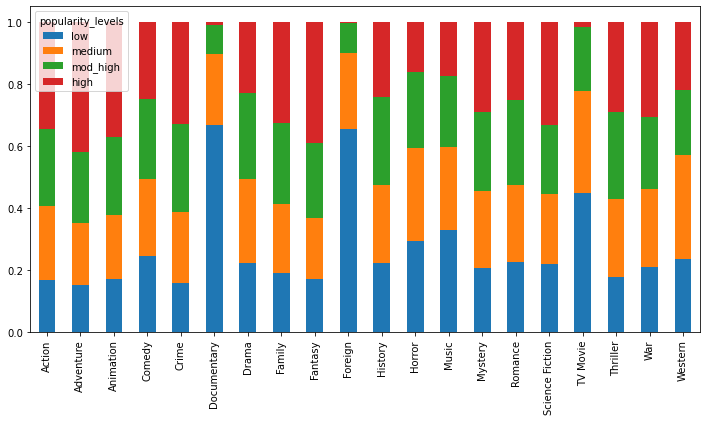

In [21]:
popularity_distribution_df.T.plot(kind='bar', stacked=True,figsize=(12,6))

### what kinds of properties are asscociated with movies that have high revenues?

To answer this question, the correlation matrix probably is the first choice. I have visualzie this into a heatmap as below. Some quick findings:

* Budget and popularity tends to have a very high positive correlation with the revenue. It shows that for a high budget moive if it's also very popular, the maker tends to earn a lot from it.
* Certain moives tends to generate more revenues such as family, fantasy and Sci-Fi. This is probably the reason we saw a lot of such moives during each summer. 



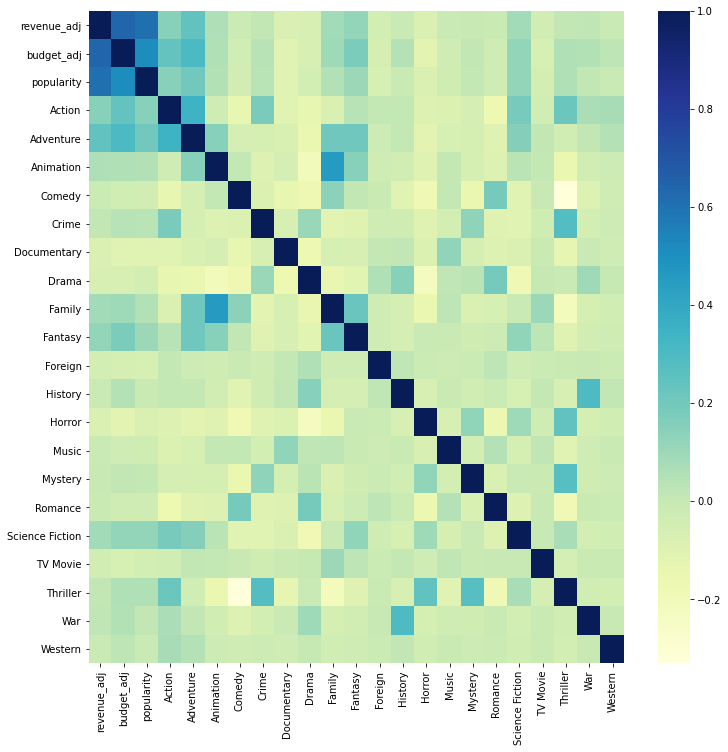

In [22]:
corr =df[['revenue_adj','budget_adj','popularity']+list(all_generes)].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, 
            cmap="YlGnBu")

I've also tried to plot a scatter plot to explore the relationship between budget and revenue. But it seems that there are a lot very low revenue moives which makes this plot not so intuitive.

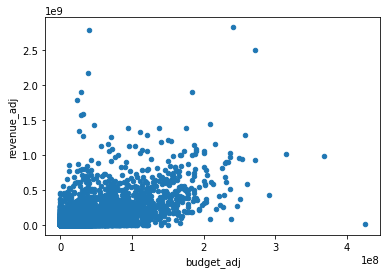

In [23]:
df[['revenue_adj','budget_adj']].plot(x='budget_adj',y='revenue_adj',kind='scatter')

In [24]:
import statsmodels.api as sm
# 'revenue_adj','budget_adj','popularity']+list(all_generes)
X = sm.add_constant(df[['budget_adj','popularity']+list(all_generes)])
model = sm.OLS(df['revenue_adj'],X).fit()

Another intuitive way is to fit an OLS with all these variables. Following is the result:

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            revenue_adj   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     547.2
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:54:47   Log-Likelihood:            -2.1508e+05
No. Observations:               10843   AIC:                         4.302e+05
Df Residuals:                   10820   BIC:                         4.304e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.583e+07   2.87e+06     -5.516      0.000   -2.15e+07   -1.02e+07
budget_adj          1.9040      0.034     55.435      0.000       1.837       1.971
popularity       5.452e+07   1.12e+06     48.489      0.000    5.23e+07    5.67e+07
Action          -5.166e+06   2.77e+06     -1.867      0.062   -1.06e+07    2.57e+05
Adventure        1.838e+07   3.25e+06      5.651      0.000     1.2e+07    2.48e+07
Animation       -5.105e+05   4.53e+06     -0.113      0.910    -9.4e+06    8.38e+06
Comedy          -3.299e+05    2.4e+06     -0.137      0.891   -5.04e+06    4.38e+06
Crime            -2.51e+06    3.2e+06     -0.785      0.432   -8.78e+06    3.76e+06
Documentary      5.838e+06   5.06e+06      1.154      0.249   -4.08e+06    1.58e+07
Drama           -2.746e+06   2.34e+06     -1.173      0.241   -7.33e+06    1.84e+06
Family           6.113e+06   3.63e+06      1.683      0.092   -1.01e+06    1.32e+07
Fantasy         -3.305e+06   3.67e+06     -0.901      0.368   -1.05e+07    3.89e+06
Foreign          5.563e+06   7.38e+06      0.754      0.451   -8.91e+06       2e+07
History         -1.705e+07   5.93e+06     -2.875      0.004   -2.87e+07   -5.43e+06
Horror           6.342e+06   3.15e+06      2.011      0.044     1.6e+05    1.25e+07
Music             1.04e+07   5.13e+06      2.027      0.043    3.43e+05    2.05e+07
Mystery         -2.754e+06   3.86e+06     -0.714      0.475   -1.03e+07    4.81e+06
Romance           4.01e+06   2.85e+06      1.409      0.159   -1.57e+06    9.59e+06
Science Fiction -9.613e+06   3.23e+06     -2.973      0.003    -1.6e+07   -3.28e+06
TV Movie         -1.47e+06   7.87e+06     -0.187      0.852   -1.69e+07    1.39e+07
Thriller        -6.766e+06   2.65e+06     -2.549      0.011    -1.2e+07   -1.56e+06
War             -1.123e+06   6.53e+06     -0.172      0.863   -1.39e+07    1.17e+07
Western         -1.691e+07   7.92e+06     -2.134      0.033   -3.24e+07   -1.38e+06
==============================================================================
Omnibus:                    12863.253   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4263824.470
Skew:                           5.898   Prob(JB):                         0.00
Kurtosis:                      99.428   Cond. No.                     3.24e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

there are a bunch of insignifcant variables. Let's drop them first and rerun.

In [26]:
oth_x_list = ['Action', 'Adventure', 
 'Family', 
#               'Fantasy', 
#  'Foreign', 
 'History',
       'Horror', 'Music', 
#               'Mystery', 
#               'Romance',
              'Science Fiction',
#        'TV Movie', 
              'Thriller',
#               'War', 
              'Western']
X = sm.add_constant(df[['budget_adj','popularity']+oth_x_list])
model = sm.OLS(df['revenue_adj'],X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            revenue_adj   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     1094.
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:54:47   Log-Likelihood:            -2.1508e+05
No. Observations:               10843   AIC:                         4.302e+05
Df Residuals:                   10831   BIC:                         4.303e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.636e+07   1.52e+06    -10.771      0.000   -1.93e+07   -1.34e+07
budget_adj          1.8994      0.034     55.935      0.000       1.833       1.966
popularity        5.44e+07   1.12e+06     48.533      0.000    5.22e+07    5.66e+07
Action          -5.376e+06   2.64e+06     -2.033      0.042   -1.06e+07   -1.92e+05
Adventure         1.83e+07   3.19e+06      5.731      0.000     1.2e+07    2.46e+07
Family           5.285e+06   3.21e+06      1.646      0.100   -1.01e+06    1.16e+07
History           -1.8e+07    5.6e+06     -3.215      0.001    -2.9e+07   -7.02e+06
Horror            6.65e+06   2.86e+06      2.327      0.020    1.05e+06    1.23e+07
Music            1.142e+07   5.09e+06      2.244      0.025    1.44e+06    2.14e+07
Science Fiction -9.389e+06   3.14e+06     -2.989      0.003   -1.55e+07   -3.23e+06
Thriller        -8.406e+06   2.37e+06     -3.550      0.000    -1.3e+07   -3.76e+06
Western         -1.711e+07   7.89e+06     -2.170      0.030   -3.26e+07   -1.65e+06
==============================================================================
Omnibus:                    12868.639   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4255491.717
Skew:                           5.904   Prob(JB):                         0.00
Kurtosis:                      99.331   Cond. No.                     3.18e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Before reading those coefficient, we probably want to check some test first. Following is the VIF test. It looks like we are fine.

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const              2.516704
budget_adj         1.482922
popularity         1.373577
Action             1.308984
Adventure          1.305165
Family             1.132039
History            1.021484
Horror             1.141761
Music              1.023454
Science Fiction    1.082735
Thriller           1.200876
Western            1.016663
dtype: float64

Back to the regression result,

* the coefficient of budget is positive which is in line with our earlier positive correlation observations.
* interestingly, the genre fantsy has an insignificant coefficient and Sci-fi shows a negative cofficient, which means if we control all other variables, these two may not give us a positive gain in revenue.
* the genres like adventure, family, horror, etc., has a positive coefficient, which means for a similar budget and popularity, these genres could generate more revenue then others. 
* Note that the true relationship between our x and y could be non-linear. And as noticed, there are a lot very low revenue moives. Further data cleaning and transformation is needed to draw a robust conculsion from this data.



<a id='conclusions'></a>
## Conclusions

### Q1: which genres are most popular from those years?
* relatively speaking, Adventure and fantasy has more movies with high popularity score, which means they tend to be more popular.
* Documentary, Foreign and TV moives tends to be less attractive as they have a lot low popularity scores.

###  Q2: what kinds of properties are asscociated with movies that have high revenues?

* Higher budget and more popular moives tends to generate more revenue.
* For moive with similar budget and popularity, genres like adventure, family, horror, etc., could generate more revenue then others. While genres like Action, History, Sci-fi, etc., tends to generate less revenues.


